In [5]:
import numpy as np
import matplotlib.pyplot as plt

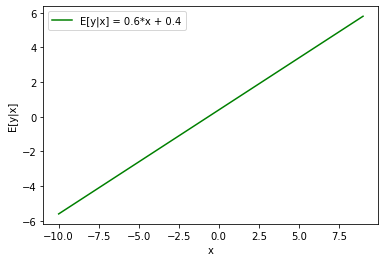

In [6]:
# (a)
# Plot the optimum estimator
x = np.arange(-10, 10, 1)
plt.plot(x, 0.6*x + 0.4, label='E[y|x] = 0.6*x + 0.4', c='g')
plt.xlabel('x')
plt.ylabel('E[y|x]')
plt.legend()
plt.show()

In [8]:
#(b)
# Generated the requested data D.
np.random.seed(453)
N = 50
mean = [1, 1]
S = [[4, 3], [3, 5]]
D = 100
X = []
Y = []
for i in range(D):
    data = np.random.multivariate_normal(mean, S, N) #https://stackoverflow.com/questions/14920272/generate-a-data-set-consisting-of-n-100-2-dimensional-samples
    data[:,0] = data[:,0] + np.random.normal(0, 1, N)
    Y.append(data[:,0])
    X.append(data[:,1])
X = np.asarray(X)
Y = np.asarray(Y)

In [9]:
print(f'x is:\n {X}\n y is:\n {Y}')

x is:
 [[ 1.61506676e+00  3.83301360e+00  1.71484218e+00 ...  1.67412493e+00
  -2.70738278e+00  3.41792386e-01]
 [-2.33035721e-03  3.45326784e+00 -2.95678033e+00 ... -9.69145844e-01
   2.11695645e+00  3.57844685e+00]
 [-2.29497659e+00  1.90658204e+00  9.60105385e-01 ...  3.59541066e-01
   2.92644749e+00 -3.80056507e+00]
 ...
 [-4.21923618e-01  1.90595358e-01  1.80800639e+00 ... -1.25815650e+00
   2.97508401e+00  3.71591811e+00]
 [-1.63273890e+00  3.25813161e-01  2.15244643e+00 ...  1.39088826e-01
   1.77694957e+00  4.37364386e+00]
 [ 2.60428150e+00 -6.64063568e-01  1.34677710e+00 ...  2.10500491e+00
   2.32107195e+00 -1.93787406e-02]]
 y is:
 [[-0.90514383  3.16399599 -0.42244825 ...  0.13943038  1.12619941
   3.79079847]
 [-0.03098442  4.90489648  2.27670748 ... -1.27541127  0.51787132
   4.96611916]
 [-3.52347477 -0.44468078  2.55334755 ...  0.85385383  2.5367703
  -0.75048156]
 ...
 [-0.62225246  2.0987366   1.45260592 ... -2.2863597   3.39442763
   1.7158684 ]
 [-3.39458446  0.5715

In [10]:
X = X.T
Y = Y.T

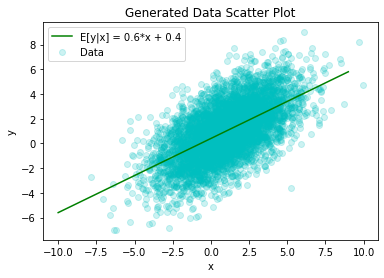

In [11]:
# Compute a scatter plot of the data around the optimum estimator.
plt.scatter(X, Y, label = 'Data', c='c', alpha=0.2)
plt.plot(x, 0.6*x + 0.4, label='E[y|x] = 0.6*x + 0.4', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data Scatter Plot')
plt.legend()
plt.show()

In [12]:
# Approximate the thetas.
theta_est = []
for i in range(D):
    arr_ones = np.ones((len(X)))
    X_new = np.column_stack((arr_ones,X.T[i][:]))
    XTXinv = np.linalg.inv(np.dot(X_new.T,X_new))
    theta = np.dot(XTXinv,X_new.T).dot(Y.T[i][:])
    theta_est.append(theta)
theta_est = np.asarray(theta_est)
theta_est

array([[ 1.79312471e-01,  5.01545111e-01],
       [ 7.43731109e-01,  8.24380965e-01],
       [ 5.29533751e-01,  7.80539274e-01],
       [ 2.76601019e-01,  5.49151185e-01],
       [ 4.86405991e-01,  5.82932211e-01],
       [ 6.05733088e-01,  4.70178915e-01],
       [ 1.57149193e-01,  8.65542968e-01],
       [ 2.70421118e-01,  5.55432992e-01],
       [ 7.90915823e-04,  6.21118820e-01],
       [ 2.50383901e-01,  6.59792012e-01],
       [ 2.77888255e-01,  6.89262212e-01],
       [ 3.20434149e-01,  7.69969706e-01],
       [ 4.70891528e-01,  7.04436204e-01],
       [ 3.55717081e-01,  6.46008633e-01],
       [ 5.84825295e-01,  5.58496974e-01],
       [ 2.89976087e-01,  5.62340547e-01],
       [ 4.13238281e-01,  8.44856972e-01],
       [ 2.00223766e-01,  6.53015253e-01],
       [ 2.10508318e-01,  7.88147892e-01],
       [ 1.01734866e+00,  5.19198114e-01],
       [ 3.16318197e-01,  6.08247692e-01],
       [ 6.45605060e-01,  6.85977892e-01],
       [ 2.87190818e-01,  5.32459959e-01],
       [ 6.

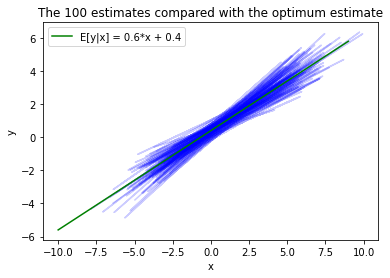

In [14]:
# Draw a plot of the estimators compared to the optimum estimator.
for i in range(D):
    plt.plot(X.T[i], theta_est[i][1]*X.T[i] + theta_est[i][0], c='b', alpha = 0.2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('The 100 estimates compared with the optimum estimate')
plt.plot(x, 0.6*x + 0.4, label='E[y|x] = 0.6*x + 0.4', c='g')
plt.legend()
plt.show()

In [15]:
# Generate 5000 data sets instead of 50, using multivariate normal.
np.random.seed(453)
N_new = 5000
X = []
Y = []
for i in range(D):
    data2 = np.random.multivariate_normal(mean, S, N_new)
    data2[:, 0] = data2[:, 0] + np.random.normal(0, 1, N_new)  # Add noise for y
    Y.append(data2[:, 0])
    X.append(data2[:, 1])
X = np.asarray(X)
Y = np.asarray(Y)
X = X.T
Y = Y.T

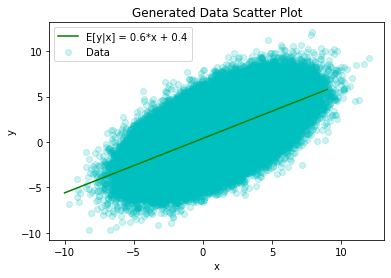

In [16]:
# Plot the generated data to review them according to the E[y|x]
plt.scatter(X, Y, label='Data', c='c', alpha=0.2)
plt.plot(x, 0.6 * x + 0.4, label='E[y|x] = 0.6*x + 0.4', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data Scatter Plot')
plt.legend()
plt.show()

In [17]:
# Find the estimated thetas
np.random.seed(453)
theta_est = []
for i in range(D):
    arr_ones = np.ones((len(X)))
    X_new = np.column_stack((arr_ones, X.T[i][:]))
    XTXinv = np.linalg.inv(np.dot(X_new.T, X_new))
    theta = np.dot(XTXinv, X_new.T).dot(Y.T[i][:])
    theta_est.append(theta)
theta_est = np.asarray(theta_est)

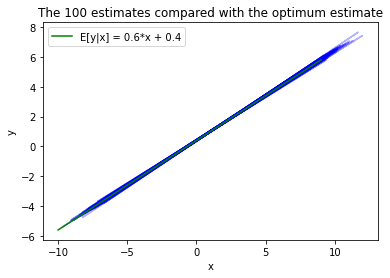

In [18]:
# Plot the new stimator.
for i in range(D):
    plt.plot(X.T[i], theta_est[i][1] * X.T[i] + theta_est[i][0], c='b', alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('The 100 estimates compared with the optimum estimate')
plt.plot(x, 0.6 * x + 0.4, label='E[y|x] = 0.6*x + 0.4', c='g')
plt.legend()
plt.show()

As expected, when plotting with more data the lines of the estimators for each data set seem to be far more closer to one another and also closer to the optimum Estimator from question (a).